# Image Classification using CNNs with Deep Learning

In [43]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
print(x_train[0]) 
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

![Convolutions](./conv.gif)

Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4235 - accuracy: 0.9509 - val_loss: 0.1181 - val_accuracy: 0.9712
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0904 - accuracy: 0.9793 - val_loss: 0.0966 - val_accuracy: 0.9780
Epoch 3/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0776 - accuracy: 0.9834 - val_loss: 0.1186 - val_accuracy: 0.9791


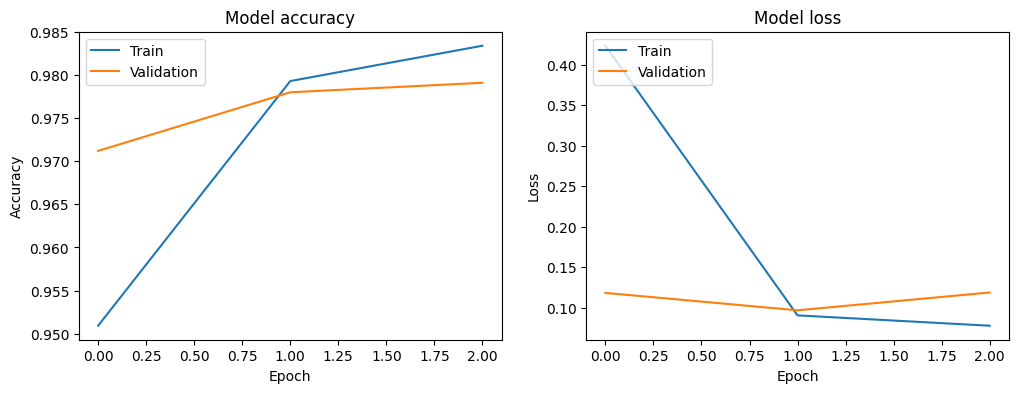

In [46]:
# tf.keras.layers.[Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten]

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))



def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

In [52]:
print("Expected Predictions: ", y_test[:15])
predictions = model.predict(x_test[:15])
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted Classes:    ", predicted_classes)

Expected Predictions:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
1/1 [==============================] - 0s 16ms/step
Predicted Classes:     [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
